My filter field code didn't work in 3D. Problem was with meshgrid. Needed `indexing='ij'`.

In [1]:
def filter_field(field,frac=0.5):
    field.require_coeff_space()
    dom = field.domain                                                                                                                                                      
    local_slice = dom.dist.coeff_layout.slices(scales=dom.dealias)                                                                                                          
    coeff = []                                                                                                                                                              
    for n in dom.global_coeff_shape:
        coeff.append(np.linspace(0,1,n,endpoint=False))                                                                                             
    cc = np.meshgrid(*coeff,indexing='ij')
    field_filter = np.zeros(dom.local_coeff_shape,dtype='bool')                                                                                                             
    for i in range(dom.dim):                                                                                                                                                
        field_filter = field_filter | (cc[i][local_slice] > frac)                                                                                                           
    field['c'][field_filter] = 0j

In [2]:
%matplotlib inline

In [3]:
import dedalus.public as de
import numpy as np
import matplotlib.pyplot as plt

In [4]:
r = de.Chebyshev('r',512,interval=[0.2,1.2])
z = de.Fourier('z',512)
theta =de.Fourier('theta',512)

dom = de.Domain([z,theta,r],grid_dtype='float')

In [5]:
temp = dom.new_field()

In [6]:
rand = np.random.RandomState(seed=42)

In [7]:
temp['g'] = rand.standard_normal(dom.dist.grid_layout.global_shape(scales=dom.dealias))

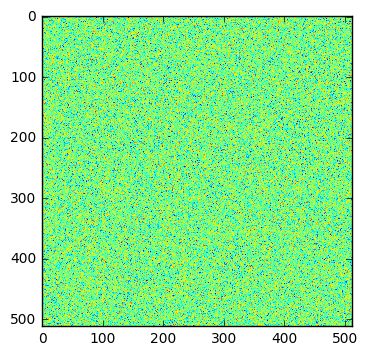

In [8]:
plt.imshow(temp['g'][:,0,:],interpolation='None')

In [9]:
filter_field(temp,frac=0.1)

In [10]:
from dedalus.extras import plot_tools

/home/joishi/build/dedalus/lib/python3.5/site-packages/numpy-1.11.0-py3.5-linux-x86_64.egg/numpy/ma/core.py:3092: ComplexWarning: Casting complex values to real discards the imaginary part
  output = self._data.astype(newtype).view(type(self))
/home/joishi/build/dedalus/lib/python3.5/site-packages/matplotlib/colors.py:943: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin = float(vmin)
/home/joishi/build/dedalus/lib/python3.5/site-packages/matplotlib/colors.py:944: ComplexWarning: Casting complex values to real discards the imaginary part
  vmax = float(vmax)


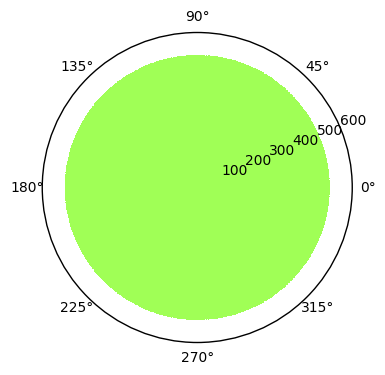

In [11]:
dplane = plot_tools.get_plane(plot_tools.FieldWrapper(temp),1,2,(0,slice(None),slice(None)))

ax=plt.axes(polar=True)
ax.pcolormesh(dplane[0],dplane[1],dplane[2])

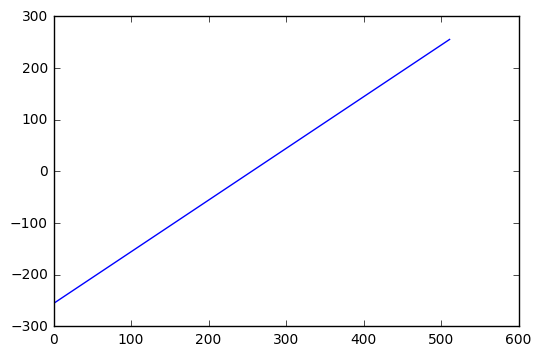

In [12]:
plt.plot(dplane[0][0,:])